In [1]:
import pickle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
X_train = pickle.load( open( "../data/X_train.p", "rb" ) )
X_test = pickle.load( open( "../data/X_test.p", "rb" ) )
y_train = pickle.load( open( "../data/y_train.p", "rb" ) )
y_test = pickle.load( open( "../data/y_test.p", "rb" ) )

### no resampling without hyperparameter tuning

In [ ]:
svc = SVC()

svc.fit(X_train, y_train.values)
y_pred = svc.predict(X_test)

print(y_test, y_pred)
print(y_train.values.ravel())
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels = ['not readmitted','readmitted'])
cmp.plot(ax = ax)

### Undersampling with no hyperparameter tuning

In [3]:
rus = RandomUnderSampler()
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

print("Before undersampling:")
print(y_train.value_counts())
print("\nAfter undersampling:")
print(y_train_undersampled.value_counts())

Before undersampling:
readmitted
0    67650
1     8053
Name: count, dtype: int64

After undersampling:
readmitted
0    8053
1    8053
Name: count, dtype: int64


In [4]:
svc = SVC()

svc.fit(X_train_undersampled, y_train_undersampled.values)
y_pred = svc.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[11170  5805]
 [  910   985]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77     16975
           1       0.15      0.52      0.23      1895

    accuracy                           0.64     18870
   macro avg       0.53      0.59      0.50     18870
weighted avg       0.85      0.64      0.71     18870


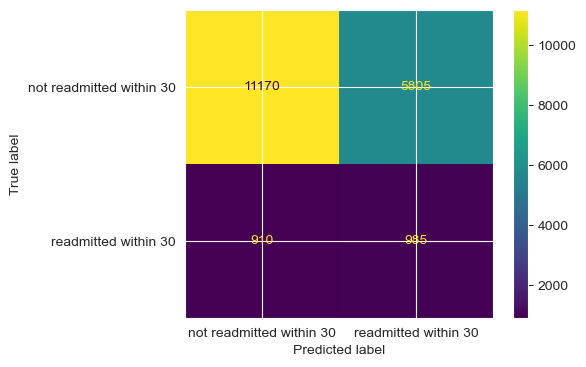

In [5]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['not readmitted within 30', 'readmitted within 30'])
cmp.plot(ax=ax)

### Oversampling and no hyper parameter tuning

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train.values.ravel())

print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_oversampled.shape)

Before SMOTE:
readmitted
0    67650
1     8053
Name: count, dtype: int64

After SMOTE:
(135300,)


In [ ]:
svc = SVC()

svc.fit(X_train_oversampled, y_train_oversampled.ravel())
y_pred = svc.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels = ['not readmitted','readmitted'])
cmp.plot(ax = ax)

In [6]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svc, parameters, n_jobs=-1, scoring='f1')
clf.fit(X_train_undersampled, y_train_undersampled.values)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.1, 1: 0.1}, {0: 0.1, 1: 0.3},
                                          {0: 0.1, 1: 0.5}]},
             scoring='f1')

In [9]:
print("Best Parameters: ", clf.best_params_)
print("Best cvs score (accuracy): ", clf.cv_results_)

Best Parameters:  {'class_weight': {0: 0.1, 1: 0.3}}
Best cvs score (accuracy):  {'mean_fit_time': array([60.44853368, 67.55729818, 43.65026999]), 'std_fit_time': array([ 3.73165415,  3.74023953, 20.21153106]), 'mean_score_time': array([18.33071141, 14.55821466,  8.93575859]), 'std_score_time': array([0.90085749, 1.24834872, 4.24001769]), 'param_class_weight': masked_array(data=[{0: 0.1, 1: 0.1}, {0: 0.1, 1: 0.3}, {0: 0.1, 1: 0.5}],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'class_weight': {0: 0.1, 1: 0.1}}, {'class_weight': {0: 0.1, 1: 0.3}}, {'class_weight': {0: 0.1, 1: 0.5}}], 'split0_test_score': array([0.56765677, 0.66666667, 0.66666667]), 'split1_test_score': array([0.56469829, 0.66652867, 0.66652867]), 'split2_test_score': array([0.56415216, 0.66652867, 0.66652867]), 'split3_test_score': array([0.55190713, 0.66680464, 0.66680464]), 'split4_test_score': array([0.56021115, 0.66680464, 0.66680464]), 'mean_test_score': arr

In [10]:
svc = SVC(class_weight={0: 0.1, 1: 0.3})

svc.fit(X_train_undersampled, y_train_undersampled.values)
y_pred = svc.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[    0 16975]
 [    0  1895]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16975
           1       0.10      1.00      0.18      1895

    accuracy                           0.10     18870
   macro avg       0.05      0.50      0.09     18870
weighted avg       0.01      0.10      0.02     18870


C:\Users\nikla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
